# Outlier Detection

### What is an outlier?

    An outlier is an observation that is unlike the other observations.
    

   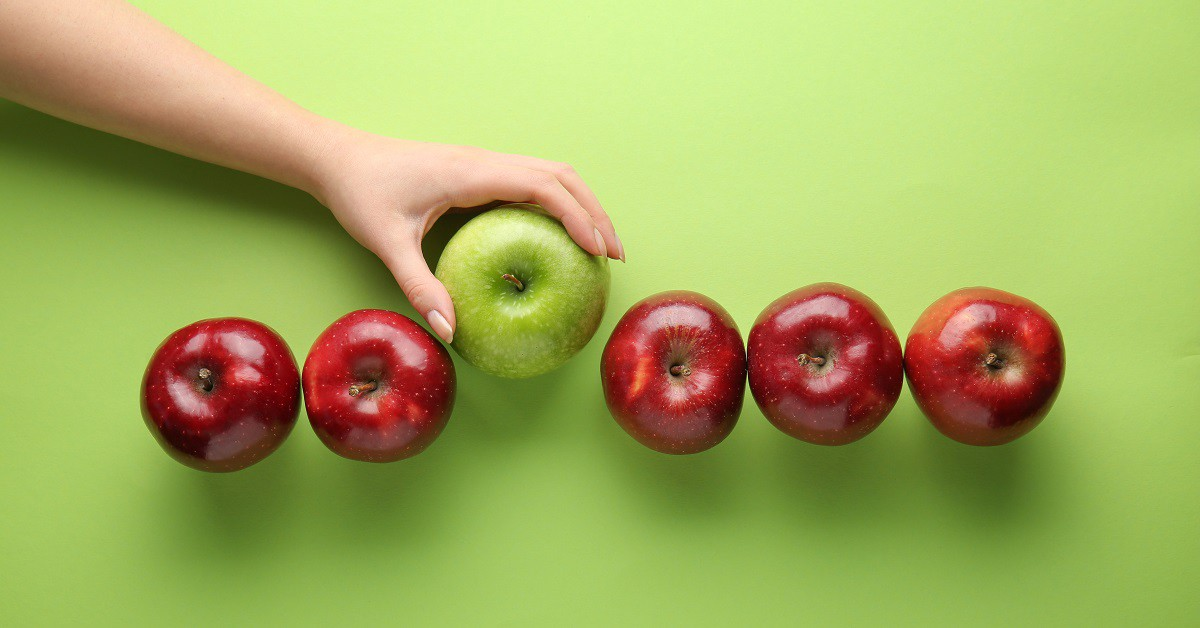



### Outliers can have many causes, such as:

    Measurement or input error
    Data corruption
    True outlier observation


### Methods for outlier detection

#### 1. Graphical methods

        i. Box plot
    
    
#### 2. Statistical methods
    
        i. Standard deviation
        ii. Inter quartile range
        iii. Grubbs' test 
    
    
#### 3. Automatic outlier detection
    
        i.   Isolation Forest
        ii.  Minimum Covariance Determinant
        iii. Local Outlier Factor(LOF)
        iv.  One-class SVM


### Box plot

In [1]:
x=[5,45,48,48,55,68,40,50,48,53,59,47,58,59,53,45,65,102]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

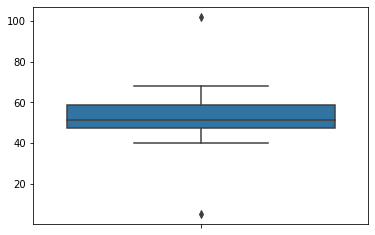

In [3]:
sns.boxplot(x,orient='v');

### Standard deviation method

If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

According to empirical rule we know that;

    1st Standard Deviation from the Mean: 68%
    2nd Standard Deviations from the Mean: 95%
    3rd Standard Deviations from the Mean: 99.7%


In [4]:
data=5*np.random.randn(1000)+100

In [5]:
data[0:10]

array([ 94.04898257,  95.96055458,  97.68736826, 102.2625025 ,
        95.38540187,  94.22456272, 105.82496405,  89.99757204,
       106.56068244,  98.65105445])

In [6]:
d_mean,d_sd=np.mean(data),np.std(data)
print('The mean of data:   ',d_mean)
print('The standard deviation of data:   ',d_sd)


The mean of data:    99.93486782132784
The standard deviation of data:    4.823547125106909


In [7]:
three_sig=d_sd*3

LB,UB=d_mean-three_sig,d_mean+three_sig

We can then identify outliers as those examples that fall outside of the defined lower bound and upper bound.

In [8]:
# identify outliers
outliers = [x for x in data if x < LB or x > UB]
print('Identified outliers: ' , len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= LB and x <= UB]
print('Non-outlier observations: ' , len(outliers_removed))

Identified outliers:  3
Non-outlier observations:  997


## Interquartile range method


Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.
A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range(IQR). The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [9]:
data1=np.random.binomial(100,0.3,5000)

In [10]:
data1.shape

(5000,)

In [11]:
q25, q75 = np.percentile(data1, 25), np.percentile(data1, 75)
IQR=q75-q25


In [12]:
cut_off=IQR*1.5
LB,UB=q25-cut_off,q75+cut_off


In [13]:
# identify outliers
outliers = [x for x in data1 if x < LB or x > UB]
print('Identified outliers: ' , len(outliers))
# remove outliers
outliers_removed = [x for x in data1 if x >= LB and x <= UB]
print('Non-outlier observations: ' , len(outliers_removed))

Identified outliers:  30
Non-outlier observations:  4970


## Grubbs' test

Grubbs’ test is used to find outliers in a normally distributed data set.

    The test is only used to find outliers in normally distributed data (excluding the potential outlier). If you think that your data set has more than one outlier, use the generalized extreme studentized deviate test or Tietjen-Moore test instead.
    Using this test on non-normal distributions will give false results.
    
    
    
    H0: There are no outliers in the data set
    Ha: There is exactly one outlier in the data set
    

In [14]:
#pip install outlier_utils

In [15]:
from outliers import smirnov_grubbs as grubbs


### Two sided Grubbs' test

In [16]:
data = np.array([5, 14, 15, 15, 14, 19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40,50,90])

#perform Grubbs' test
grubbs.test(data, alpha=.05)



array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

### One sided Grubbs' test

In [17]:
#perform Grubbs' test to see if minimum value is an outlier
grubbs.min_test(data, alpha=.05)


array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29, 40,
       50, 90])

In [18]:
#perform Grubbs' test to see if minimum value is an outlier
grubbs.max_test(data, alpha=.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

In [19]:
grubbs.max_test_indices(data, alpha=.05)

[18, 17, 16]

## Automatic Outlier Detection

The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data.


In [20]:
import os
os.chdir('F:\FST_Symbiosis\datasets')

In [21]:
data=pd.read_csv('winequality_data.csv')

In [22]:
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,id
0,6.7,0.15,0.38,1.7,0.037,20.0,84.0,0.99046,3.09,0.53,11.4,6,981
1,6.7,0.44,0.31,1.9,0.030,41.0,104.0,0.99000,3.29,0.62,12.6,7,982
2,6.1,0.17,0.21,1.9,0.090,44.0,130.0,0.99255,3.07,0.41,9.7,5,983
3,6.6,0.39,0.22,4.0,0.038,17.0,98.0,0.99018,3.25,0.53,13.0,7,984
4,6.8,0.32,0.34,6.0,0.050,5.0,129.0,0.99530,3.19,0.40,9.1,5,985


In [23]:
print(data.shape)
print(data.columns)

(3918, 13)
Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')


In [24]:
data.drop('id',inplace=True,axis=1)

In [25]:
data.corr()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.018244,0.297831,0.093249,0.017633,-0.057874,0.079012,0.267259,-0.431066,-0.011915,-0.126329,-0.111060
volatile.acidity,-0.018244,1.000000,-0.140043,0.077979,0.069602,-0.096284,0.088366,0.033974,-0.045407,-0.032703,0.071912,-0.189113
citric.acid,0.297831,-0.140043,1.000000,0.106384,0.109368,0.088143,0.114861,0.157975,-0.165478,0.059628,-0.077949,-0.008064
residual.sugar,0.093249,0.077979,0.106384,1.000000,0.096991,0.303088,0.411613,0.842294,-0.199808,-0.012444,-0.453181,-0.101570
chlorides,0.017633,0.069602,0.109368,0.096991,1.000000,0.101693,0.195431,0.260935,-0.086290,0.014115,-0.363394,-0.214543
free.sulfur.dioxide,-0.057874,-0.096284,0.088143,0.303088,0.101693,1.000000,0.623179,0.294149,0.004650,0.063534,-0.250605,0.002892
total.sulfur.dioxide,0.079012,0.088366,0.114861,0.411613,0.195431,0.623179,1.000000,0.532155,0.002910,0.143494,-0.451141,-0.177076
density,0.267259,0.033974,0.157975,0.842294,0.260935,0.294149,0.532155,1.000000,-0.101704,0.080072,-0.778263,-0.313763
pH,-0.431066,-0.045407,-0.165478,-0.199808,-0.086290,0.004650,0.002910,-0.101704,1.000000,0.151962,0.123085,0.097981
sulphates,-0.011915,-0.032703,0.059628,-0.012444,0.014115,0.063534,0.143494,0.080072,0.151962,1.000000,-0.010429,0.053632


In [26]:
X,y=data[['fixed.acidity', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'quality']],data[ 'alcohol']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=1,test_size=0.3)

In [29]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)


(2742, 9)
(1176, 9)
(2742,)
(1176,)


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()

In [32]:
 model=lr.fit(X_train1,y_train1)

In [33]:
y_pred=model.predict(X_test1)

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
print('MAE     :' ,mean_absolute_error(y_test1,y_pred))
print('MSE     :', mean_squared_error(y_test1,y_pred))
print('R2      :',r2_score(y_test1,y_pred))

MAE     : 0.3173527843152424
MSE     : 0.16626274516769107
R2      : 0.8931691380095498


## Isolation forest

Isolation Forest, is a tree-based anomaly or outlier detection algorithm. Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [36]:
from sklearn.ensemble import IsolationForest

In [37]:
iso = IsolationForest(contamination=0.05)

In [38]:
yhat = iso.fit_predict(X_train1)

In [39]:
mask = yhat != -1
X_train, y_train = X_train1.iloc[mask, :], y_train1.iloc[mask]

In [41]:
print(X_train.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test1.shape)

(2604, 9)
(1176, 9)
(2604,)
(1176,)


In [42]:
lr2=LinearRegression()

In [43]:
model2=lr2.fit(X_train,y_train)

In [44]:
y_pred2=model2.predict(X_test1)

In [45]:
print('MAE     :' ,mean_absolute_error(y_test1,y_pred2))
print('MSE     :', mean_squared_error(y_test1,y_pred2))
print('R2      :',r2_score(y_test1,y_pred2))

MAE     : 0.28852717111213527
MSE     : 0.14776946940310662
R2      : 0.9050518516563444


## Local Outlier Factor(LOF)

This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality. The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.



    The model provides the “contamination” argument, that is the expected percentage of outliers in the dataset, be indicated and defaults to 0.1

In [46]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.2)
ypred = lof.fit_predict(X_train1)

In [47]:
mask = ypred != -1
X_train, y_train = X_train1.iloc[mask, :], y_train1.iloc[mask]

In [48]:
model3=lr.fit(X_train,y_train)

In [49]:
y_pred3=model3.predict(X_test1)

In [50]:
print('MAE     :' ,mean_absolute_error(y_test1,y_pred3))
print('MSE     :', mean_squared_error(y_test1,y_pred3))
print('R2      :',r2_score(y_test1,y_pred3))

MAE     : 0.2902608586120157
MSE     : 0.1494187135825921
R2      : 0.9039921423561674


## Minimum Covariance Determinant

If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers. For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution. This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier. An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant, or MCD for short.

In [51]:
from sklearn.covariance import EllipticEnvelope

In [52]:
ee = EllipticEnvelope(contamination=0.1)
y_pred = ee.fit_predict(X_train1)

In [53]:
mask = y_pred != -1
X_train, y_train = X_train1.iloc[mask, :], y_train1.iloc[mask]

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred4 = model.predict(X_test1)

In [56]:
print('MAE     :' ,mean_absolute_error(y_test1,y_pred4))
print('MSE     :', mean_squared_error(y_test1,y_pred4))
print('R2      :',r2_score(y_test1,y_pred4))

MAE     : 0.28790116043353936
MSE     : 0.1478817127075897
R2      : 0.9049797305749891
